In [17]:
import os
import shutil
import tifffile
import numpy as np
from pathlib import Path
from matplotlib.pyplot import imshow, subplots
from careamics_portfolio import PortfolioManager

from careamics_restoration.engine import Engine
from careamics_restoration.metrics import psnr

### Import Dataset Portfolio

In [4]:
# Explore portfolio
portfolio = PortfolioManager()
print(portfolio.denoising)

denoising datasets: ['N2V_BSD68', 'N2V_SEM', 'N2V_RGB', 'Flywing', 'Convallaria']


In [14]:
# Download files
root_path = Path("./data")
files = portfolio.denoising.N2V_SEM.download(root_path)
print(f"List of downloaded files: {files}")

Unzipping contents of '/home/igor.zubarev/projects/caremics/examples/data/denoising-N2V_SEM' to '/home/igor.zubarev/projects/caremics/examples/data/denoising-N2V_SEM.unzip'


List of downloaded files: ['/home/igor.zubarev/projects/caremics/examples/data/denoising-N2V_SEM.unzip/train.tif', '/home/igor.zubarev/projects/caremics/examples/data/denoising-N2V_SEM.unzip/validation.tif']


### Visualize training image

Image shape: (2500, 1690)


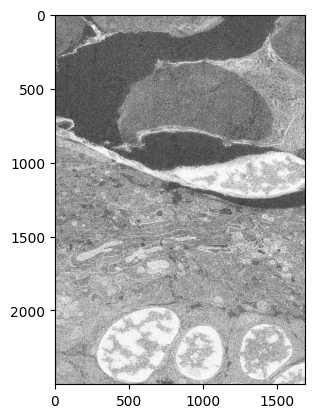

In [15]:
# Load images
image = tifffile.imread(files[0])
print(f"Image shape: {image.shape}")
imshow(image, cmap="gray")

In [ ]:

data_path = Path(root_path / "n2v_sem")
train_path = data_path / "train"
val_path = data_path / "val"

train_path.mkdir(parents=True, exist_ok=True)
val_path.mkdir(parents=True, exist_ok=True)

shutil.move(root_path / files[0], train_path / "train_image.tif")
shutil.move(root_path / files[1], val_path / "val_image.tif")

In [ ]:
# Checkout the training data
print(train_image.shape, train_image.min(), train_image.max())
imshow(train_image, cmap="gray")

#TODO add an option to write to config file ?

In [ ]:
# and the validation data
print(val_image.shape)
imshow(val_image, cmap="gray")

In [2]:
#TODO add an option to write to config file ?

engine = Engine("n2v_2D_SEM.yml")

ValidationError: 3 validation errors for Configuration
data.training_path
  Value error, Path n2v_sem/train does not exist [type=value_error, input_value='n2v_sem/train', input_type=str]
    For further information visit https://errors.pydantic.dev/2.0.1/v/value_error
data.validation_path
  Value error, Path n2v_sem/val does not exist [type=value_error, input_value='n2v_sem/val', input_type=str]
    For further information visit https://errors.pydantic.dev/2.0.1/v/value_error
data.prediction_path
  Value error, Path n2v_sem/train does not exist [type=value_error, input_value='n2v_sem/train', input_type=str]
    For further information visit https://errors.pydantic.dev/2.0.1/v/value_error

In [ ]:
engine.train()

In [ ]:
_, preds = engine.predict()

In [ ]:
print(len(preds))
pred = preds[0][0, :, :].detach().cpu().numpy()

In [ ]:
print(pred.min(), pred.max())
imshow(pred, cmap="gray")